In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Working Plots

In [23]:
with open('results/SGD-results.json') as json_file:
    sgd_data = json.load(json_file)

with open('results/SAM-results.json') as json_file:
    sam_data = json.load(json_file)

sgd_data_list = []
sam_data_list = []
for key in sgd_data.keys():
    sgd_data_list.append(sgd_data[key])
    sam_data_list.append(sam_data[key])

sgd_accuracies = sgd_data_list[0]
sam_accuracies = sam_data_list[0]

mean_sgd_accuracies = np.mean(sgd_accuracies, axis=0)
mean_sam_accuracies = np.mean(sam_accuracies, axis=0)

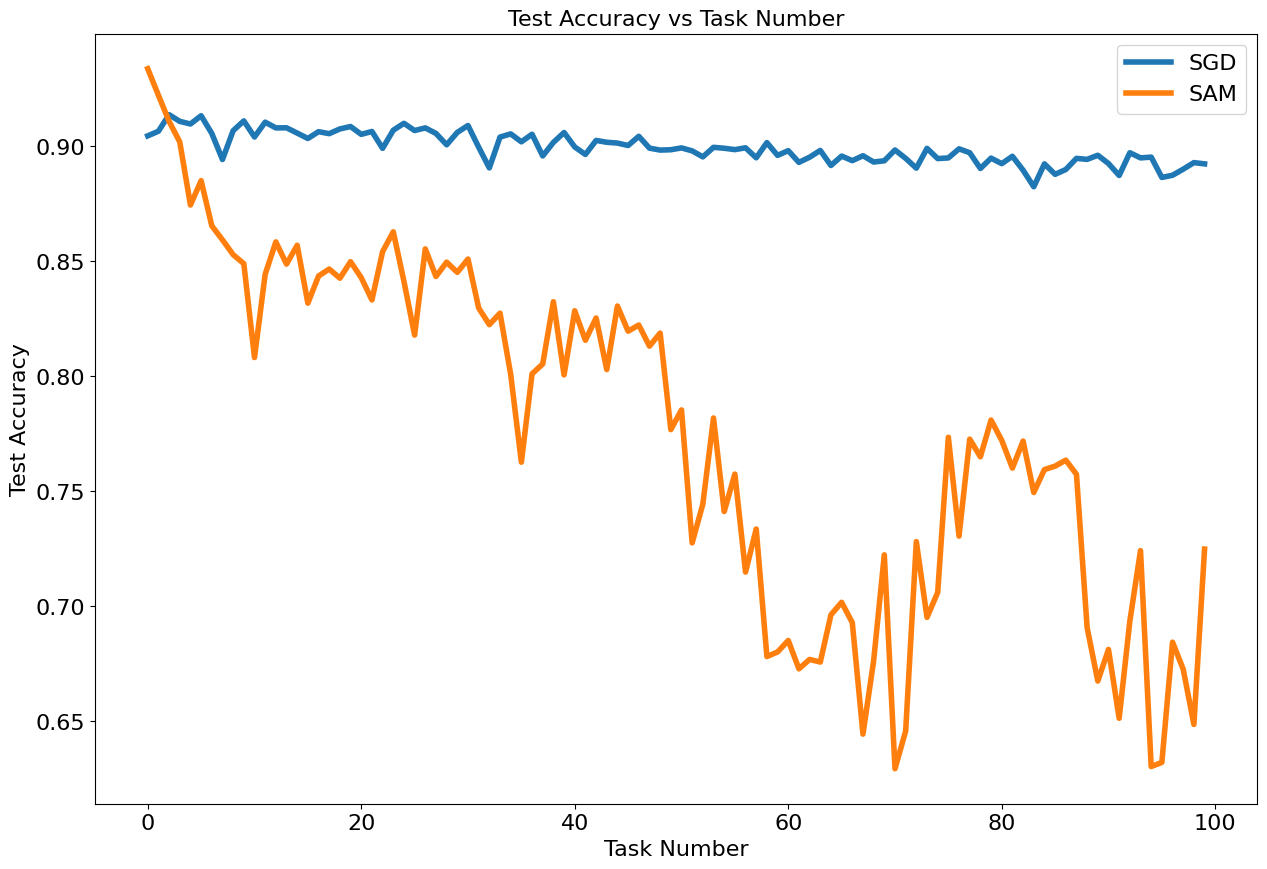

In [43]:
fig = plt.figure(figsize=(15, 10))

plt.plot(mean_sgd_accuracies, label='SGD', linewidth=4)
plt.plot(mean_sam_accuracies, label='SAM', linewidth=4)
plt.xlabel('Task Number', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.title('Test Accuracy vs Task Number', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('results/SGD-SAM-plot.png', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Final Plots

In [67]:
with open('results/aggregated-accuracies.json') as json_file:
    raw_accuracies = json.load(json_file)

mean_accuracies = dict()
for model, accuracies in raw_accuracies.items():
    model_mean_accuracies = np.mean(accuracies, axis=0)
    mean_accuracies[model] = model_mean_accuracies
mean_accuracies.items()

dict_items([('SGD-01', array([0.917 , 0.9118, 0.9122, 0.9056, 0.903 , 0.9008, 0.9064, 0.9014,
       0.9056, 0.9116, 0.9072, 0.9008, 0.9012, 0.9078, 0.8994, 0.9054,
       0.9042, 0.9002, 0.8984, 0.9008, 0.9056, 0.899 , 0.9004, 0.8962,
       0.8918, 0.9032, 0.8996, 0.9036, 0.902 , 0.895 , 0.8962, 0.8958,
       0.893 , 0.899 , 0.9014, 0.8964, 0.8928, 0.9038, 0.8932, 0.8944,
       0.9044, 0.8988, 0.8938, 0.896 , 0.896 , 0.8922, 0.902 , 0.8984,
       0.9   , 0.898 , 0.9006, 0.8892, 0.894 , 0.89  , 0.8938, 0.8906,
       0.894 , 0.8994, 0.8902, 0.8968, 0.8788, 0.8934, 0.894 , 0.8962,
       0.8922, 0.8918, 0.8072, 0.8844, 0.8936, 0.8804, 0.8844, 0.8912,
       0.8944, 0.8912, 0.8966, 0.892 , 0.8822, 0.8888, 0.8866, 0.8934,
       0.9006, 0.892 , 0.8844, 0.8852, 0.888 , 0.8924, 0.8768, 0.8858,
       0.887 , 0.8488, 0.8936, 0.8804, 0.8944, 0.886 , 0.8792, 0.8892,
       0.8914, 0.884 , 0.8894, 0.8848])), ('SGD-001', array([0.8314, 0.841 , 0.8508, 0.8548, 0.8696, 0.8658, 0.869 , 0.865 ,


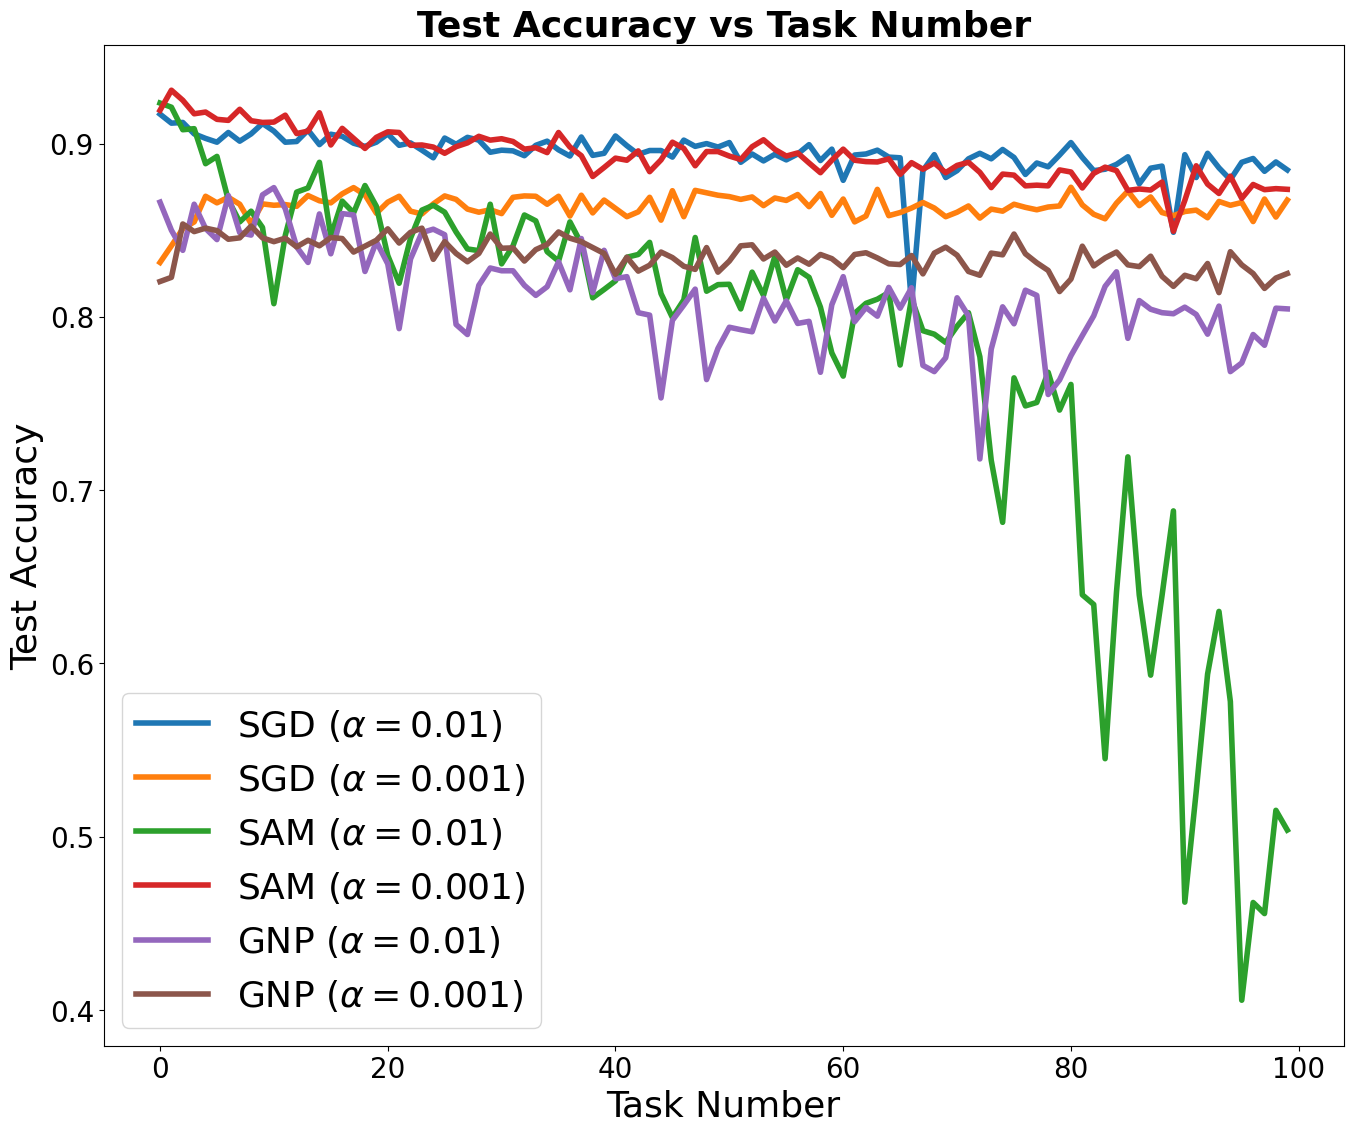

In [119]:
fig = plt.figure(figsize=(16, 13))

for model, accuracies in mean_accuracies.items():
    label = model[:3] + ' ($\\alpha=0.' + str(model[4:]) + '$)'
    plt.plot(accuracies, label=label, linewidth=4)

plt.xlabel('Task Number', fontsize=26)
plt.xticks(fontsize=20)

plt.ylabel('Test Accuracy', fontsize=26)
plt.yticks(fontsize=20)

plt.title('Test Accuracy vs Task Number', fontsize=26, fontweight='bold')
plt.legend(fontsize=26)

plt.savefig('figs/combined-plot.png', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [108]:
accuracy_differences = dict()
for model, accuracies in raw_accuracies.items():
    for accuracies_list in accuracies:
        for i in range(len(accuracies_list) - 1):
            accuracy_differences[model] = accuracy_differences.get(model, []) + [accuracies_list[i + 1] - accuracies_list[i]]

mean_accuracy_differences = dict()
for model, differences in accuracy_differences.items():
    mean_accuracy_differences[model] = np.mean(differences)
sorted = list(mean_accuracy_differences.items())
sorted.sort(key=lambda x: x[1])
sorted

[('SAM-01', -0.004238383838383838),
 ('GNP-01', -0.0006222222222222221),
 ('SAM-001', -0.00046060606060606104),
 ('SGD-01', -0.00032525252525252555),
 ('GNP-001', 4.646464646464628e-05),
 ('SGD-001', 0.00036363636363636394)]

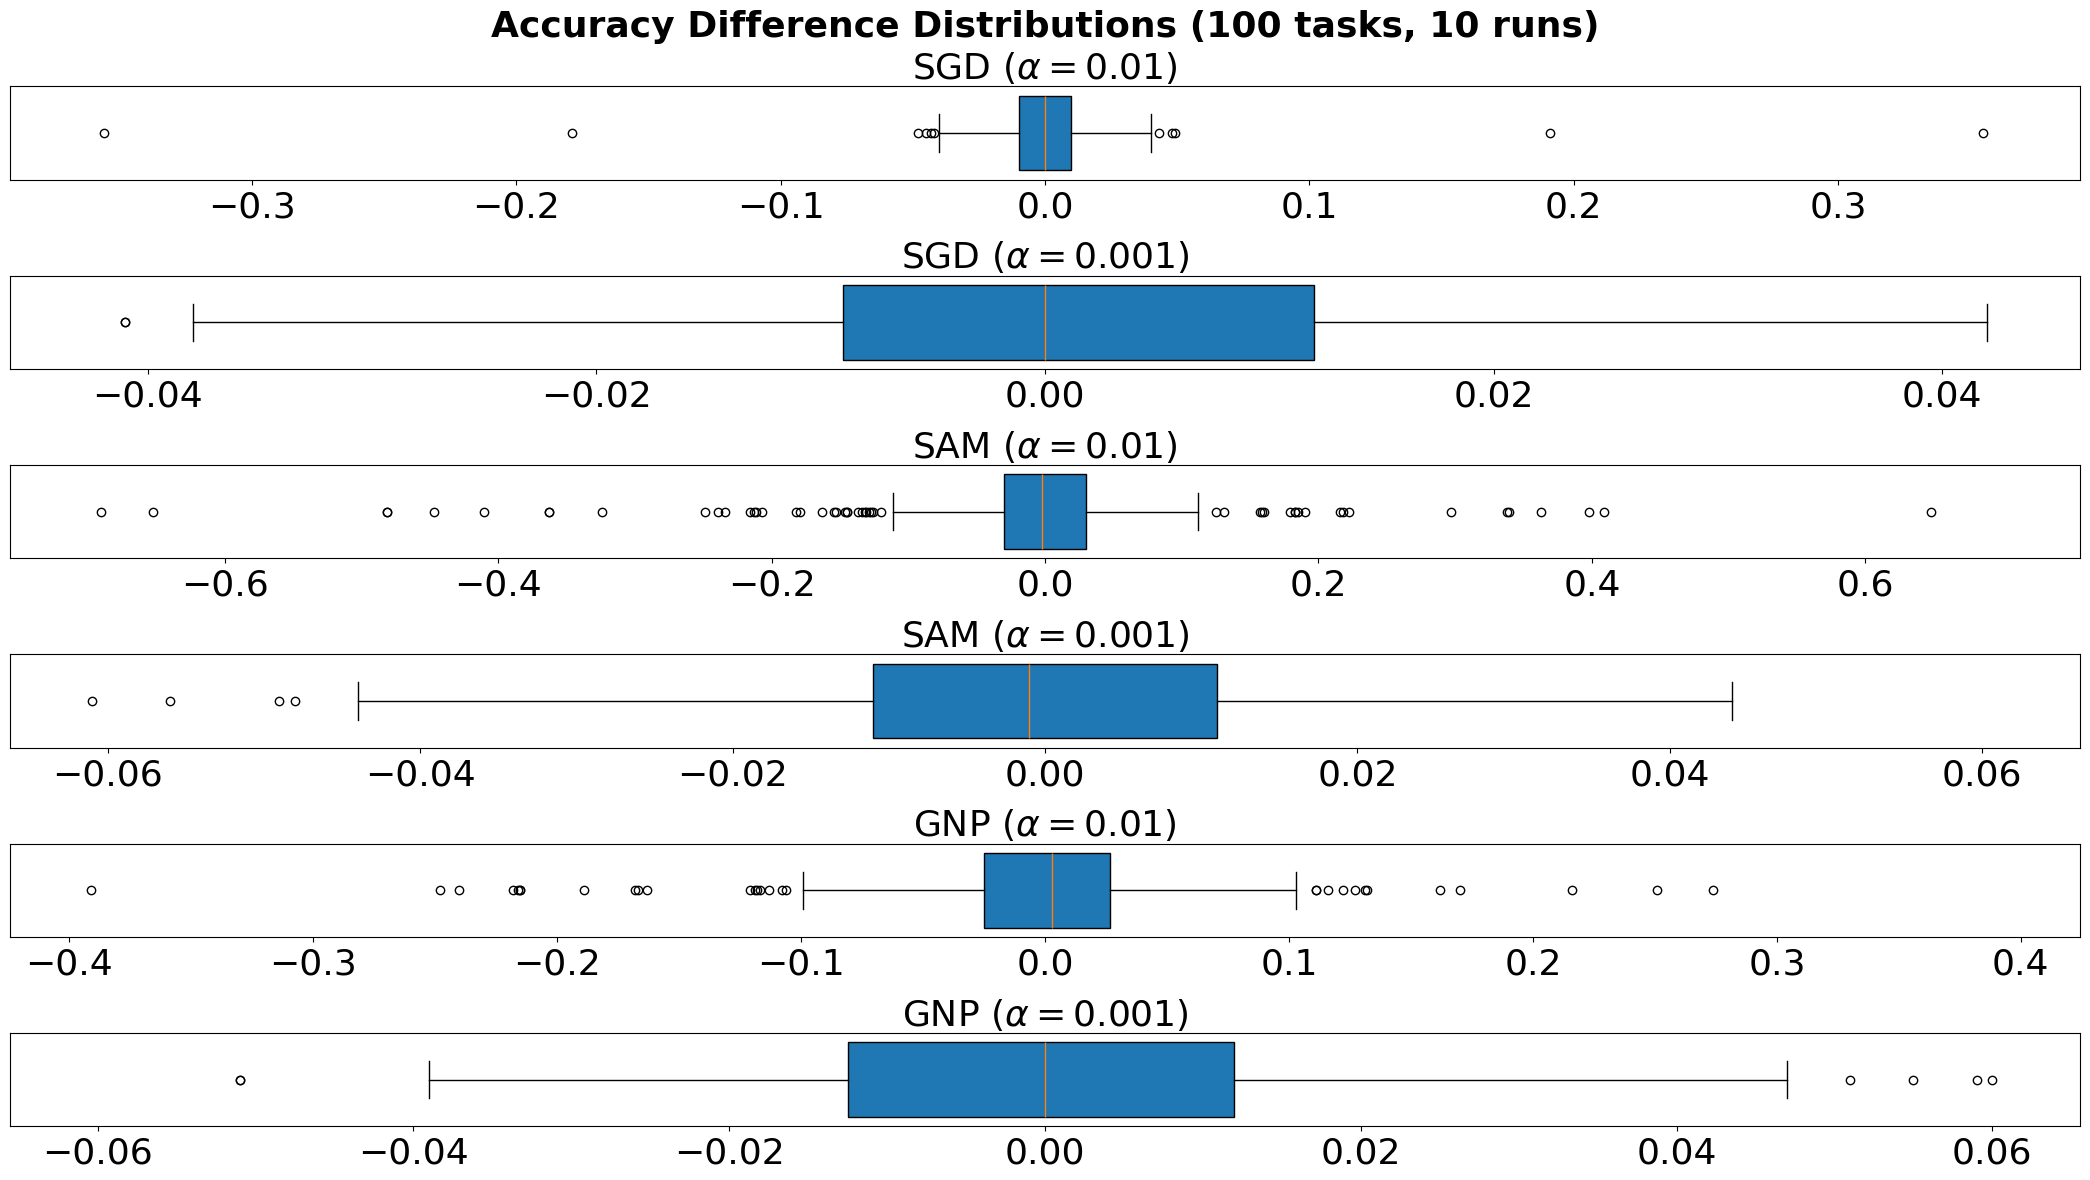

In [122]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(accuracy_differences), figsize=(21, 12))

for i, (model, differences) in enumerate(accuracy_differences.items()):
  axs[i].boxplot(differences, vert=False, patch_artist=True, widths=0.8)
  axs[i].set_title(model[:3] + ' ($\\alpha=0.' + str(model[4:]) + '$)', fontsize=26)
  axs[i].set_ylabel('')
  axs[i].set_yticks([])
  

  colors = ['lightblue', 'lightgreen', 'lightpink']
  for patch in axs[i].artists:
    patch.set_facecolor(colors[i % len(colors)])

  x_min, x_max = axs[i].get_xlim()
  if abs(x_min) > abs(x_max):
    axs[i].set_xlim(-abs(x_min), abs(x_min))
  else:
    axs[i].set_xlim(-abs(x_max), abs(x_max))

for ax in axs.flat:
    ax.tick_params(labelsize=26)

plt.suptitle('Accuracy Difference Distributions (100 tasks, 10 runs)', fontsize=26, fontweight='bold')
plt.tight_layout()

plt.savefig('figs/accuracy-differences.png', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()